In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.cluster import KMeans
import matplotlib.dates as mdates
from sklearn import decomposition

## Load data in a nice way

The dataset comprises of the 
- electrodermal activity (EDA), 
- heart-rate (HR)
- temperature (TEMP)
- blood-volume pulse (BVP)

data from the E4 biosensors. The participants were instructed to turn on the E4 at the beginning of each round, tag the start and stop times of the rest and puzzle phases within each round, and to turn off the E4 at the end of each round. Thus, each participant has 4 × 3 recordings corresponding to the four rounds and three phases. The data from each biosensor is provided under the phase directory for each individual as ``biosignal.csv``.

In [2]:
BVP = pd.read_csv('dataset/D1_1/ID_1/round_1/phase1/BVP.csv', index_col=0, parse_dates = ["time"]).set_index("time")
EDA = pd.read_csv('dataset/D1_1/ID_1/round_1/phase1/EDA.csv', index_col=0,  parse_dates = ["time"]).set_index("time")
HR = pd.read_csv('dataset/D1_1/ID_1/round_1/phase1/HR.csv', index_col=0,  parse_dates = ["time"]).set_index("time")
TEMP = pd.read_csv('dataset/D1_1/ID_1/round_1/phase1/TEMP.csv', index_col=0,  parse_dates = ["time"]).set_index("time")
response = pd.read_csv('dataset/D1_1/ID_1/round_1/phase1/response.csv', index_col=0)
display(BVP, EDA, HR, TEMP, response)

,BVP
time,
2021-12-17 16:11:54.953125,-61.33
2021-12-17 16:11:54.968750,-56.25
2021-12-17 16:11:54.984375,-47.83
2021-12-17 16:11:55.000000,-35.69
2021-12-17 16:11:55.015625,-20.53
...,...
2021-12-17 16:19:22.125000,-65.00
2021-12-17 16:19:22.140625,-67.25
2021-12-17 16:19:22.156250,-69.35


,EDA
time,
2021-12-17 16:11:55.000,0.185827
2021-12-17 16:11:55.250,0.203768
2021-12-17 16:11:55.500,0.192234
2021-12-17 16:11:55.750,0.189671
2021-12-17 16:11:56.000,0.185827
...,...
2021-12-17 16:19:21.000,0.283225
2021-12-17 16:19:21.250,0.281944
2021-12-17 16:19:21.500,0.283225


,HR
time,
2021-12-17 16:11:55,76.75
2021-12-17 16:11:56,76.75
2021-12-17 16:11:57,76.73
2021-12-17 16:11:58,76.72
2021-12-17 16:11:59,76.72
...,...
2021-12-17 16:19:18,78.73
2021-12-17 16:19:19,78.73
2021-12-17 16:19:20,78.77


,TEMP
time,
2021-12-17 16:11:55.000,30.97
2021-12-17 16:11:55.250,30.97
2021-12-17 16:11:55.500,30.97
2021-12-17 16:11:55.750,30.97
2021-12-17 16:11:56.000,31.01
...,...
2021-12-17 16:19:21.000,31.45
2021-12-17 16:19:21.250,31.45
2021-12-17 16:19:21.500,31.45


,particpant_ID,puzzler,team_ID,E4_nr,upset,hostile,alert,ashamed,inspired,nervous,determined,attentive,afraid,active,frustrated
0,7,1,2,A0388C,1,1,2,1,2,2,3,3,1,2,1


## Create some time-series plots over a single experiment 
one day, one person, one round

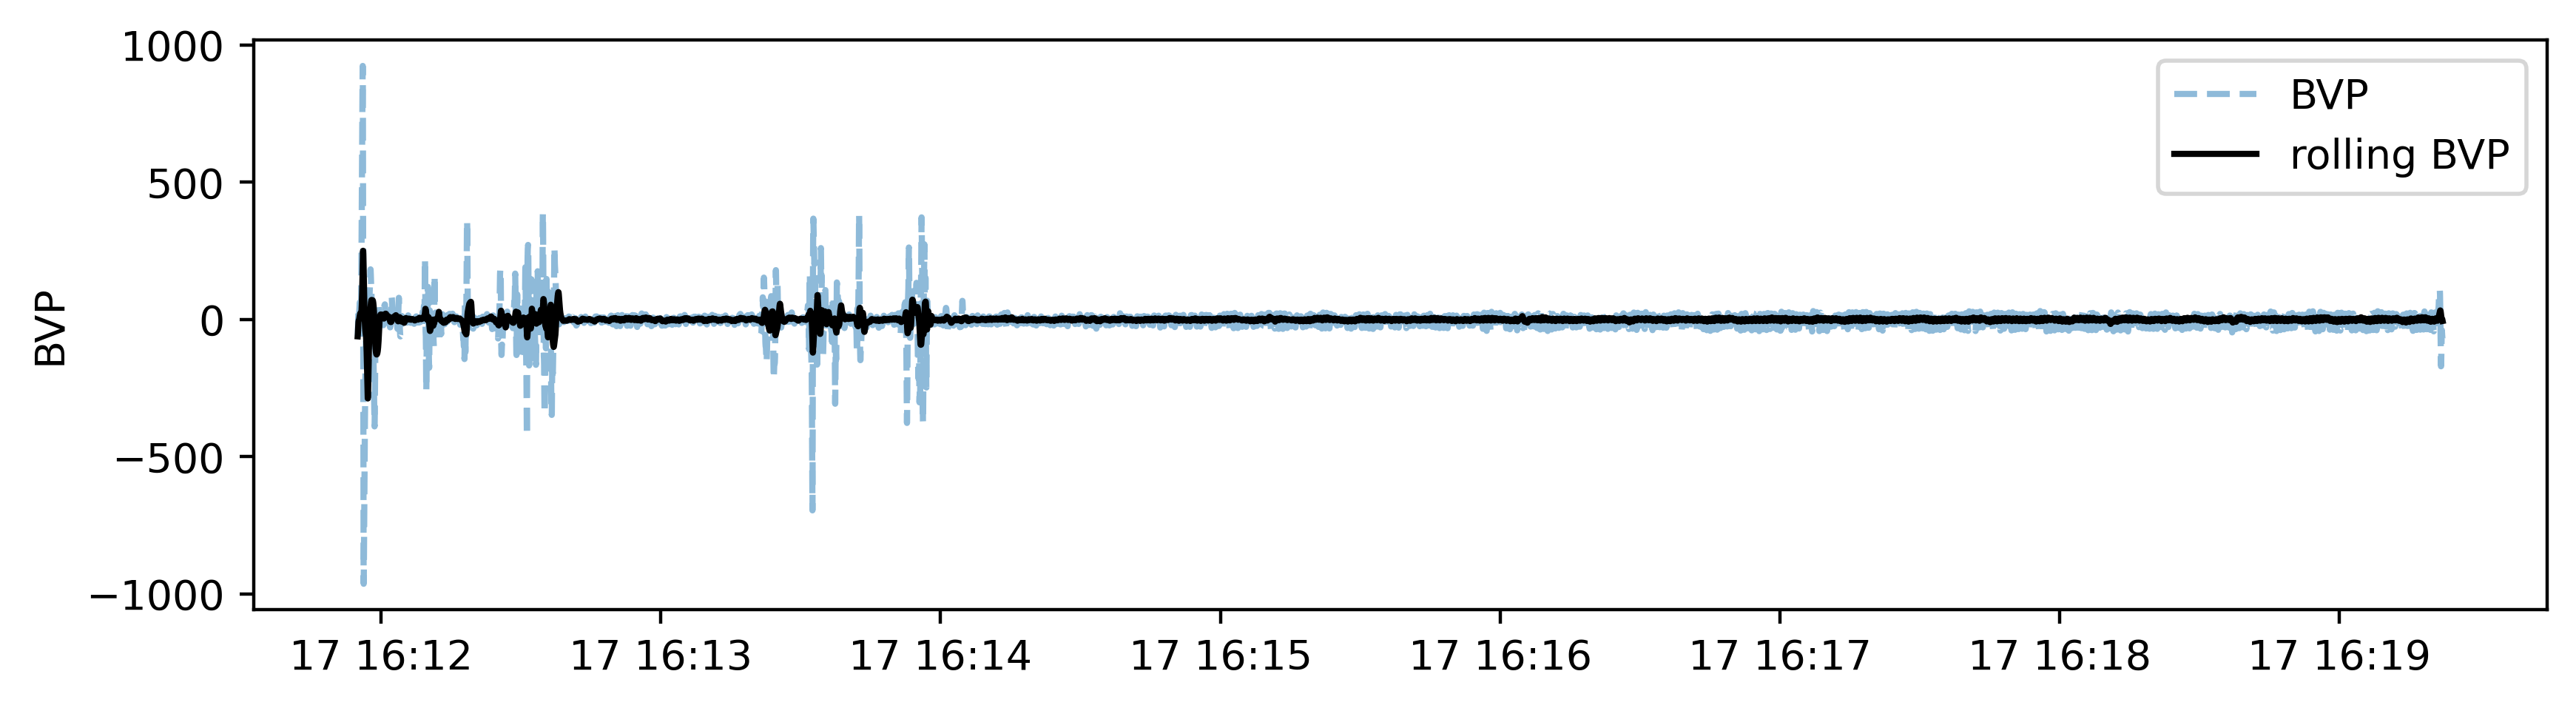

In [3]:
rolled_series = BVP["BVP"].rolling("1S").mean() # 1S = 1 second

# default axis formatting is day, time
# myFmt = mdates.DateFormatter("%M:%S")
fig, ax = plt.subplots(figsize=(10,2.5), dpi=400)
ax.plot(BVP.index, BVP['BVP'], ls = "--", alpha = 0.5, label = "BVP")
ax.plot(rolled_series.index, rolled_series.values, color = "k", label = "rolling BVP")
ax.set_ylabel("BVP")
ax.legend();
# ax.xaxis.set_major_formatter(myFmt)

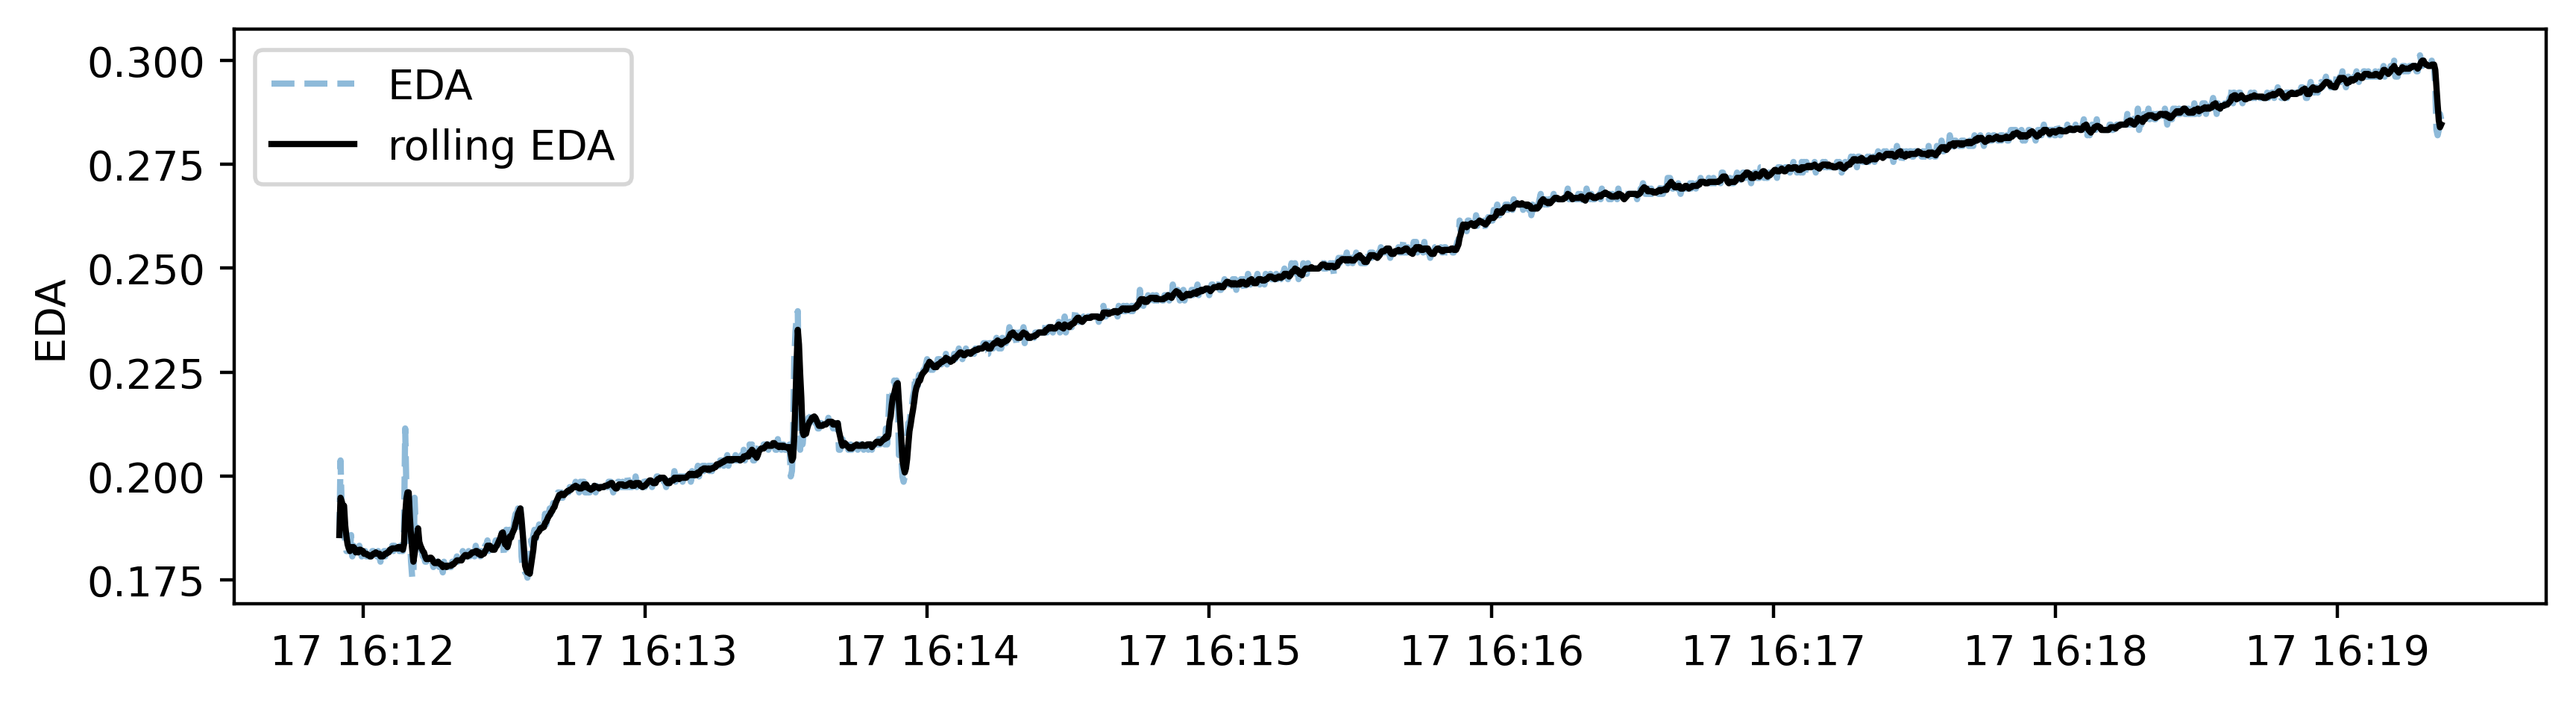

In [4]:
rolled_series = EDA["EDA"].rolling("1S").mean() # 1S = 1 second

fig, ax = plt.subplots(figsize=(10,2.5), dpi=400)
ax.plot(EDA.index, EDA.EDA, ls = "--", alpha = 0.5, label = "EDA")
ax.plot(rolled_series.index, rolled_series.values, color = "k", label = "rolling EDA")
ax.set_ylabel("EDA")
ax.legend();

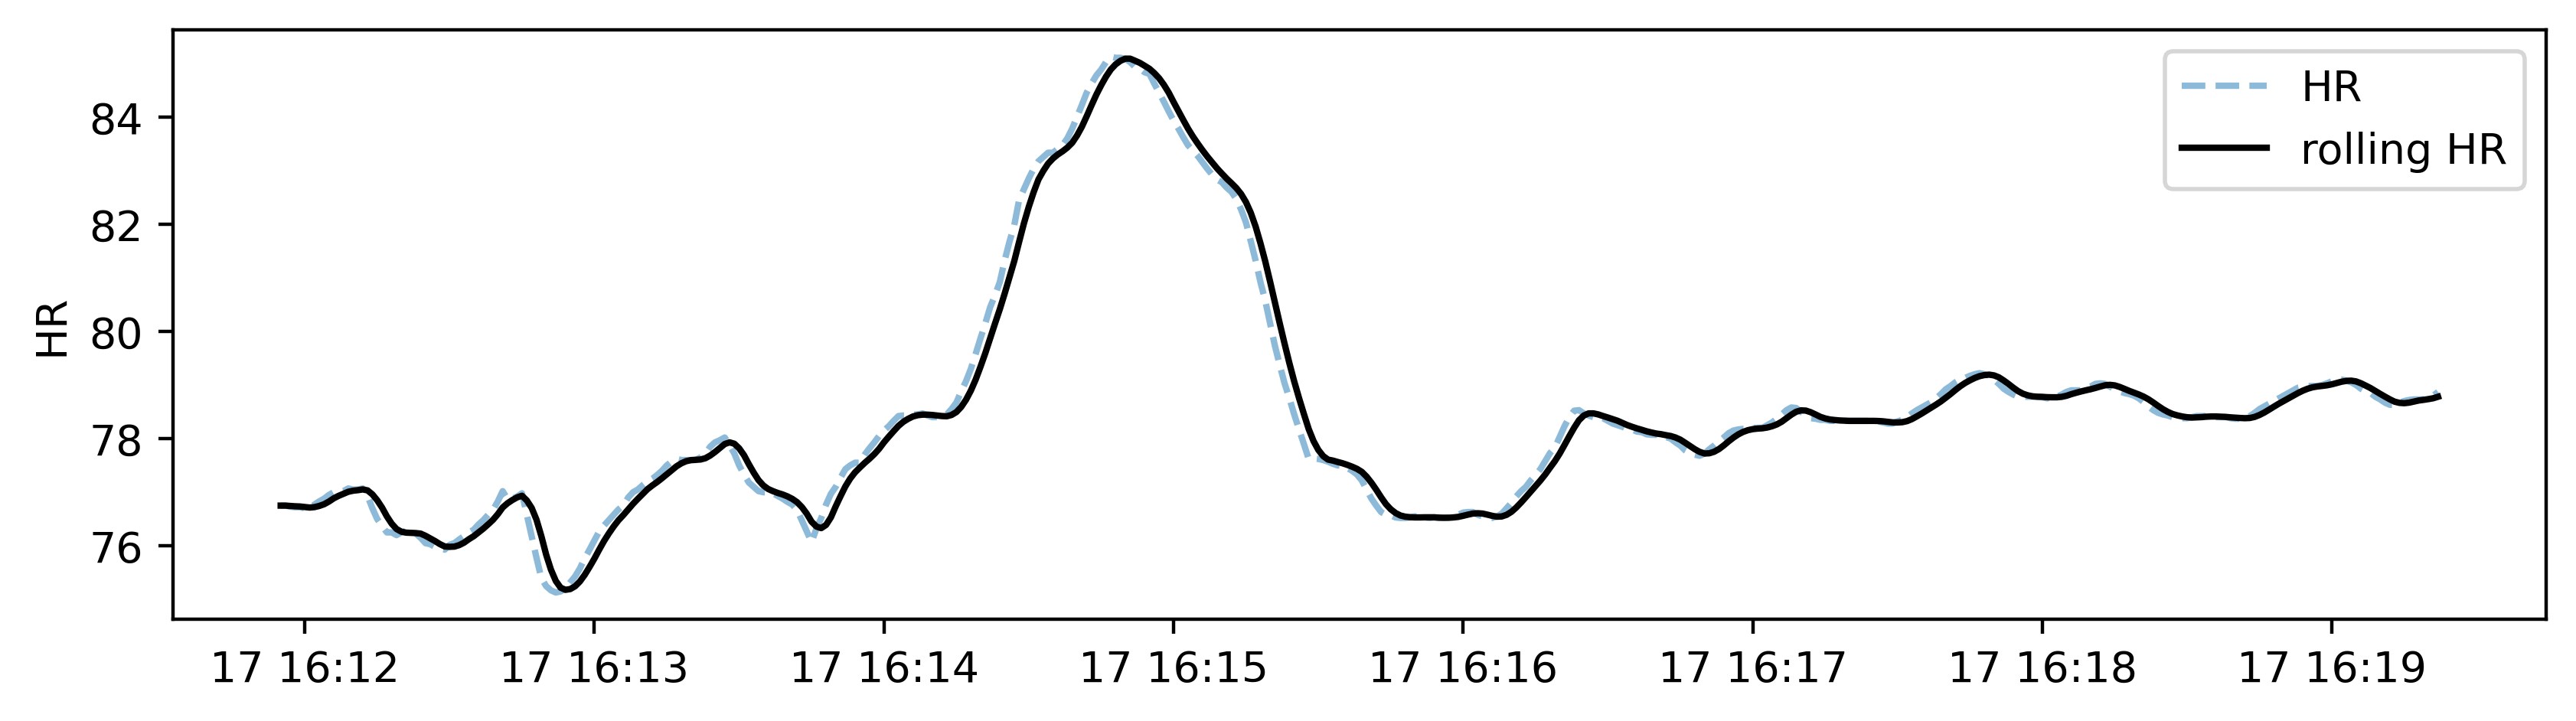

In [5]:
rolled_series = HR["HR"].rolling("5S").mean() # 1S = 1 second

fig, ax = plt.subplots(figsize=(10,2.5), dpi=400)
ax.plot(HR.index, HR.HR, ls = "--", alpha = 0.5, label = "HR")
ax.plot(rolled_series.index, rolled_series.values, color = "k", label = "rolling HR")
ax.set_ylabel("HR")
ax.legend();

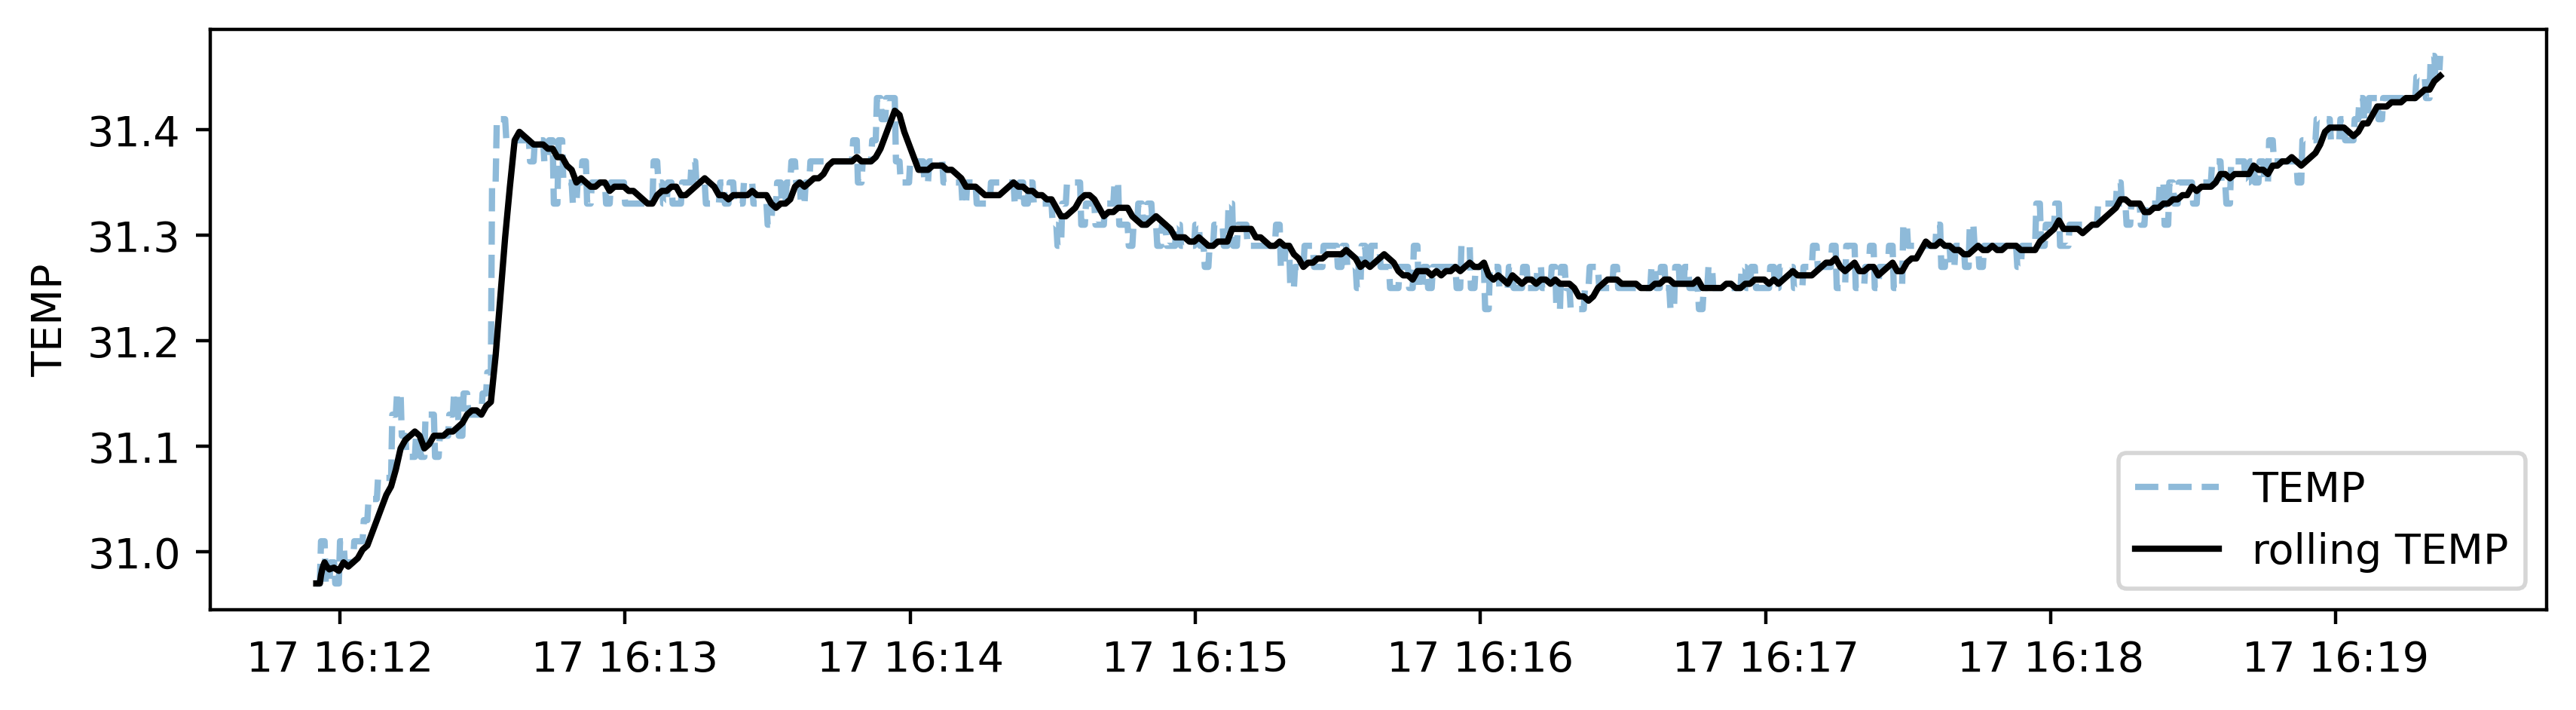

In [6]:
rolled_series = TEMP["TEMP"].rolling("5S").mean() # 1S = 1 second

fig, ax = plt.subplots(figsize=(10,2.5), dpi=400)
ax.plot(TEMP.index, TEMP.TEMP, ls = "--", alpha = 0.5, label = "TEMP")
ax.plot(rolled_series.index, rolled_series.values, color = "k", label = "rolling TEMP")
ax.set_ylabel("TEMP")
ax.legend();

# Concatenate all phases

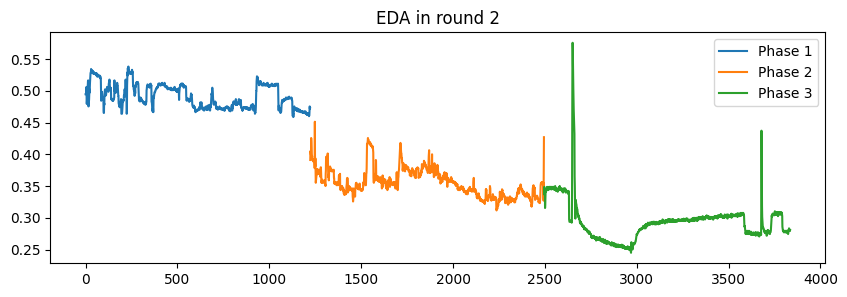

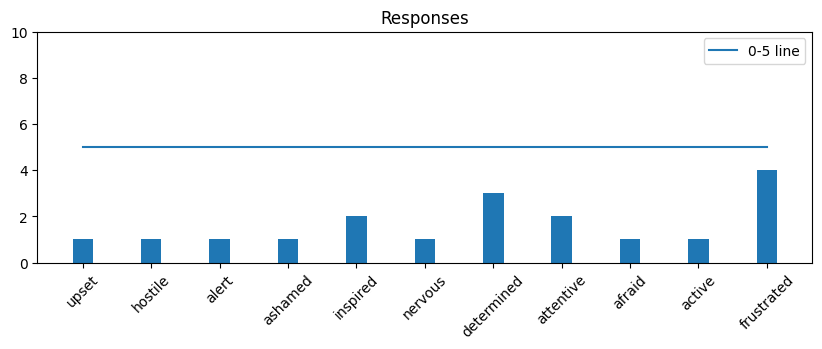

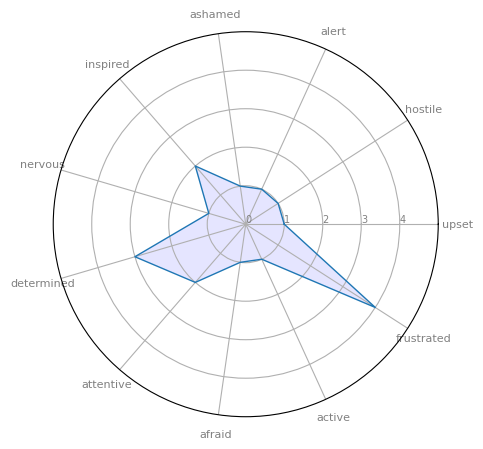

In [118]:
# Assign which measurement and round from person 1 in D1_1
measurement = "EDA"
round_nr = "2"

# Get all rounds
phase_one = pd.read_csv('dataset/D1_1/ID_1/round_' + round_nr + '/phase1/' + measurement + '.csv', index_col=0,  parse_dates = ["time"]).set_index("time")
phase_two = pd.read_csv('dataset/D1_1/ID_1/round_' + round_nr + '/phase2/' + measurement +'.csv', index_col=0,  parse_dates = ["time"]).set_index("time")
phase_three = pd.read_csv('dataset/D1_1/ID_1/round_' + round_nr + '/phase3/' + measurement +'.csv', index_col=0,  parse_dates = ["time"]).set_index("time")

# Plot the measurement by concatenation from assigned round
fig, ax = plt.subplots(figsize=(10, 3))
offset = 0
ax.plot(np.arange(offset, offset + len(phase_one)), phase_one[measurement].to_numpy(), label = "Phase 1")
offset += len(phase_one)
ax.plot(np.arange(offset, offset + len(phase_two)), phase_two[measurement].to_numpy(), label = "Phase 2")
offset += len(phase_two)
ax.plot(np.arange(offset, offset + len(phase_three)), phase_three[measurement].to_numpy(), label = "Phase 3")
ax.legend()
plt.title("%s in round %s" %(measurement, round_nr))
plt.show()

# Get responses from round
response = pd.read_csv('dataset/D1_1/ID_1/round_' + round_nr + '/phase1/response.csv', index_col = 0)
self_evals = response.columns[4:]

# Plot the responses, added line for visualizing limit for 0-5 questions
fig, ax = plt.subplots(figsize=(10, 3))
ax.bar(np.arange(0, len(self_evals)), response[self_evals].to_numpy()[0], width = 0.3)
ax.plot(np.ones(len(self_evals)) * 5, label = "0-5 line")
plt.xticks(np.arange(0, len(self_evals)), list(self_evals), rotation = 45)
plt.ylim(0, 10)
plt.legend()
plt.title("Responses")
plt.show()

N = len(self_evals)
# We need to repeat the first value to close the circular graph:
values= response[self_evals].to_numpy()[0]
values = np.append(values, values[:1])
values
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
fig, ax = plt.subplots(figsize=(5, 5), subplot_kw={'projection': 'polar'})
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], list(self_evals), color='grey', size=8)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks(list(range(5)), list(range(5)), color="grey", size=7)
plt.ylim(0,5)

# Plot data
ax.plot(angles, values, linewidth=1, linestyle='solid')

# Fill area
ax.fill(angles, values, 'b', alpha=0.1)

# Show the graph
plt.show()

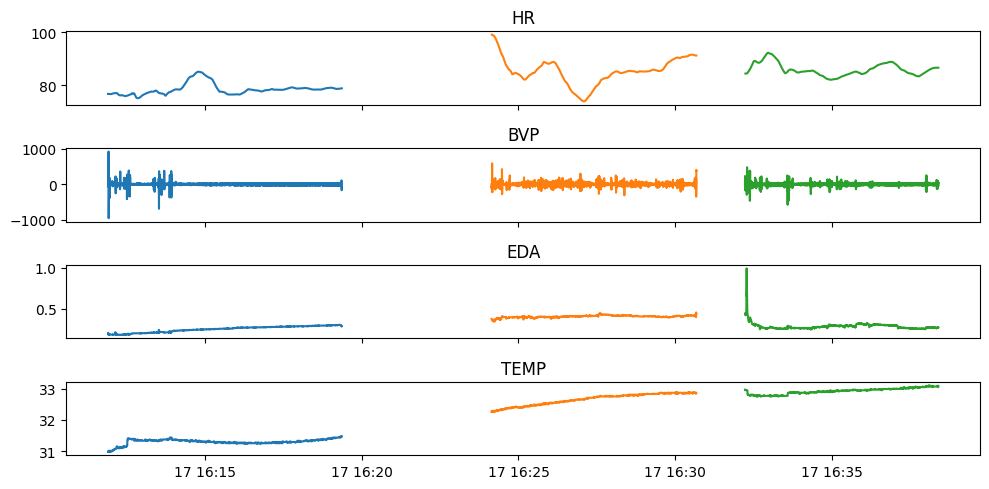

In [8]:
phase_one_HR = pd.read_csv('dataset/D1_1/ID_1/round_1/phase1/HR.csv', index_col=0,  parse_dates = ["time"])
phase_two_HR = pd.read_csv('dataset/D1_1/ID_1/round_1/phase2/HR.csv', index_col=0,  parse_dates = ["time"])
phase_three_HR = pd.read_csv('dataset/D1_1/ID_1/round_1/phase3/HR.csv', index_col=0,  parse_dates = ["time"])
phase_one_BVP = pd.read_csv('dataset/D1_1/ID_1/round_1/phase1/BVP.csv', index_col=0,  parse_dates = ["time"])
phase_two_BVP = pd.read_csv('dataset/D1_1/ID_1/round_1/phase2/BVP.csv', index_col=0,  parse_dates = ["time"])
phase_three_BVP = pd.read_csv('dataset/D1_1/ID_1/round_1/phase3/BVP.csv', index_col=0,  parse_dates = ["time"])
phase_one_EDA = pd.read_csv('dataset/D1_1/ID_1/round_1/phase1/EDA.csv', index_col=0,  parse_dates = ["time"])
phase_two_EDA = pd.read_csv('dataset/D1_1/ID_1/round_1/phase2/EDA.csv', index_col=0,  parse_dates = ["time"])
phase_three_EDA = pd.read_csv('dataset/D1_1/ID_1/round_1/phase3/EDA.csv', index_col=0,  parse_dates = ["time"])
phase_one_TEMP = pd.read_csv('dataset/D1_1/ID_1/round_1/phase1/TEMP.csv', index_col=0,  parse_dates = ["time"])
phase_two_TEMP = pd.read_csv('dataset/D1_1/ID_1/round_1/phase2/TEMP.csv', index_col=0,  parse_dates = ["time"])
phase_three_TEMP = pd.read_csv('dataset/D1_1/ID_1/round_1/phase3/TEMP.csv', index_col=0,  parse_dates = ["time"])


fig, ax = plt.subplots(4, 1, figsize=(10, 5), sharex='col', tight_layout=True)
ax[0].plot(phase_one_HR["time"], phase_one_HR["HR"], label = "HR Phase 1")
ax[0].plot(phase_two_HR["time"], phase_two_HR["HR"], label = "HR Phase 2")
ax[0].plot(phase_three_HR["time"], phase_three_HR["HR"], label = "HR Phase 3")
ax[0].set_title("HR")
ax[1].plot(phase_one_BVP["time"], phase_one_BVP["BVP"], label = "BVP Phase 1")
ax[1].plot(phase_two_BVP["time"], phase_two_BVP["BVP"], label = "BVP Phase 2")
ax[1].plot(phase_three_BVP["time"], phase_three_BVP["BVP"], label = "BVP Phase 3")
ax[1].set_title("BVP")
ax[2].plot(phase_one_EDA["time"], phase_one_EDA["EDA"], label = "EDA Phase 1")
ax[2].plot(phase_two_EDA["time"], phase_two_EDA["EDA"], label = "EDA Phase 2")
ax[2].plot(phase_three_EDA["time"], phase_three_EDA["EDA"], label = "EDA Phase 3")
ax[2].set_title("EDA")
ax[3].plot(phase_one_TEMP["time"], phase_one_TEMP["TEMP"], label = "TEMP Phase 1")
ax[3].plot(phase_two_TEMP["time"], phase_two_TEMP["TEMP"], label = "TEMP Phase 2")
ax[3].plot(phase_three_TEMP["time"], phase_three_TEMP["TEMP"], label = "TEMP Phase 3")
ax[3].set_title("TEMP")
plt.show()

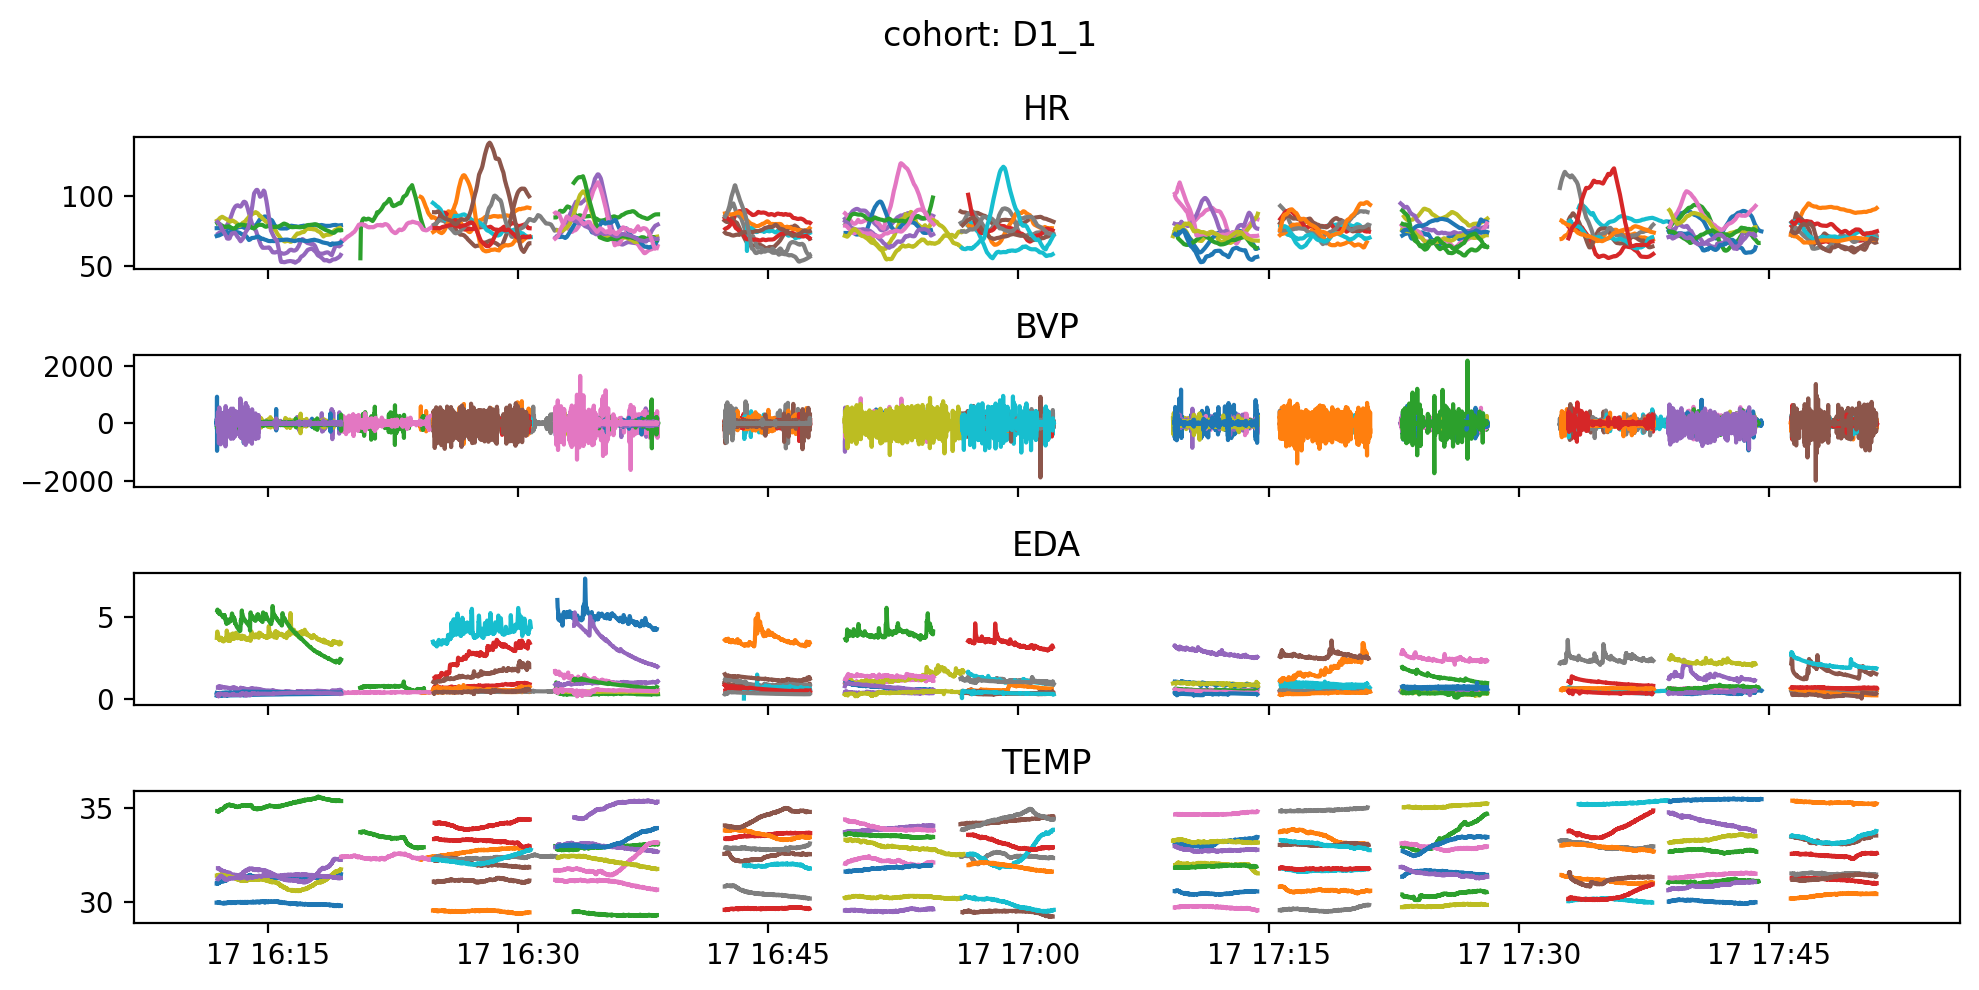

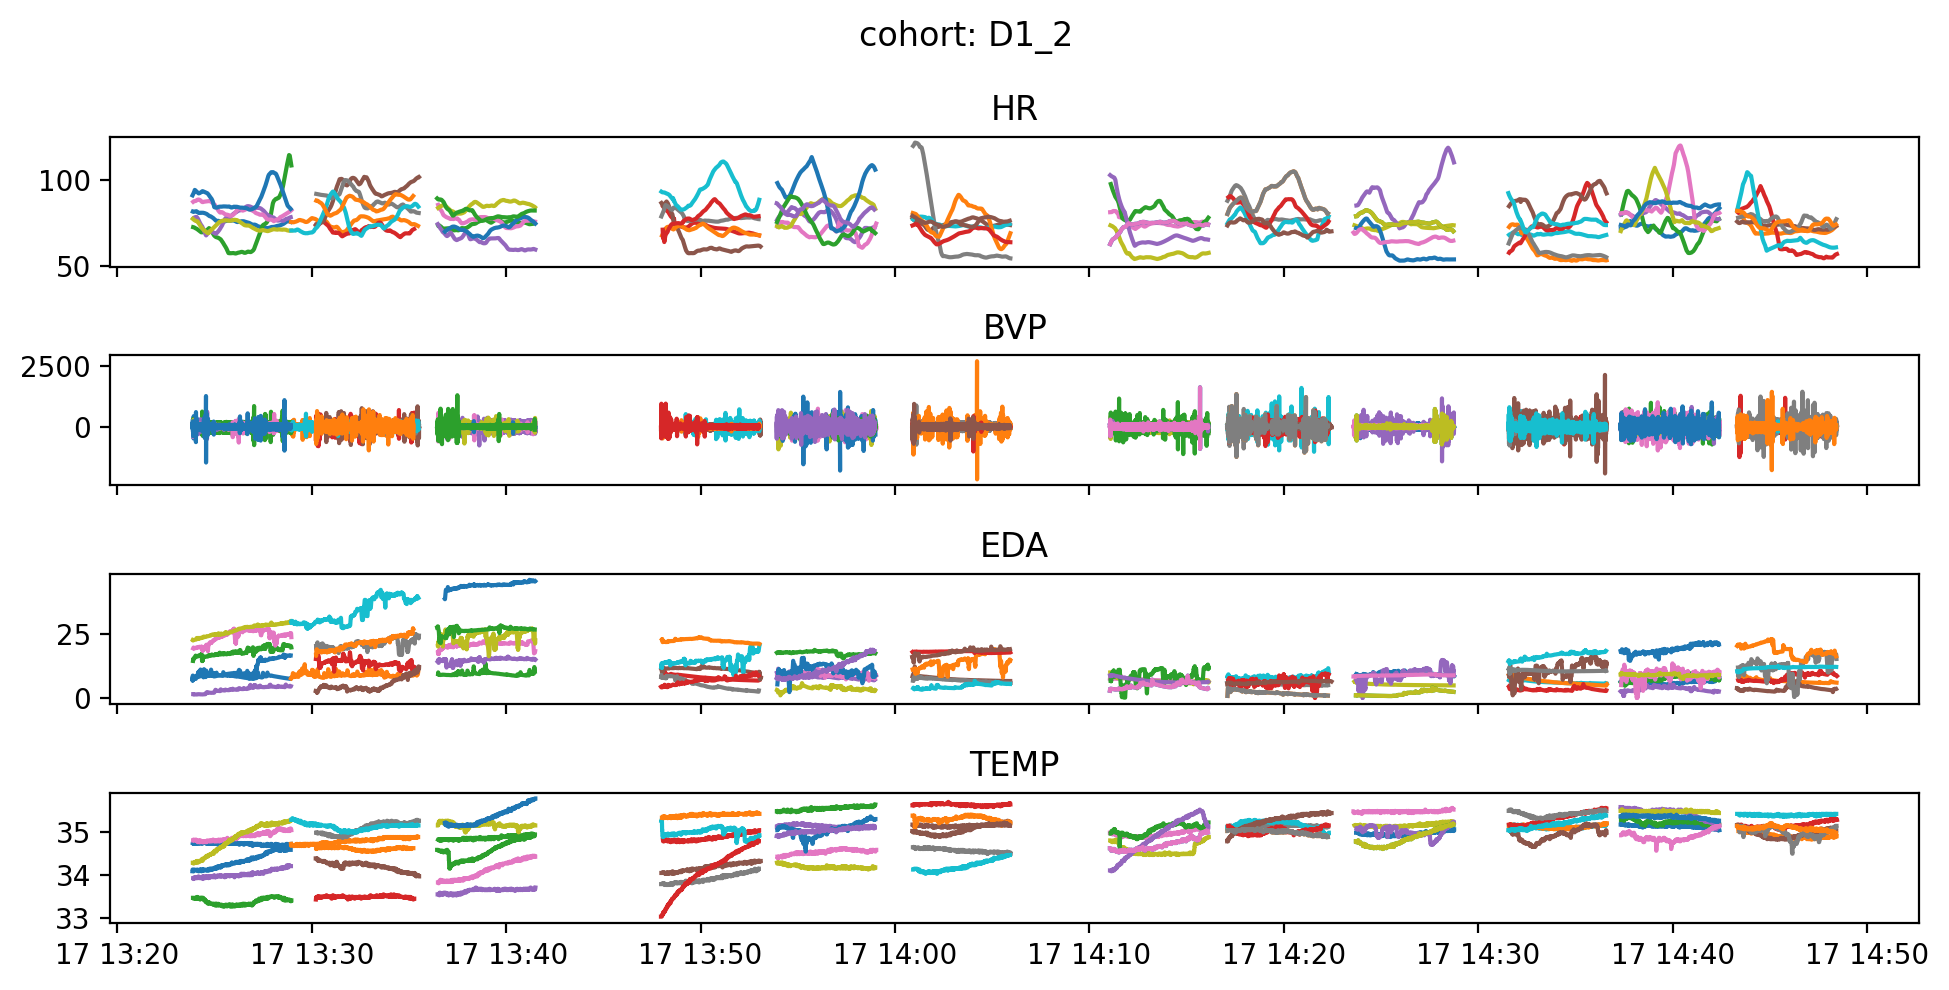

In [9]:
# to make life easier for myself, I am excluding cohort 3
cohorts = ['D1_1', 'D1_2']
ids = {'D1_1': ['ID_1','ID_2','ID_3','ID_4','ID_5','ID_6','ID_7','ID_8'],
       'D1_2': ['ID_1','ID_2','ID_3','ID_4','ID_5','ID_6']}
rounds = ['round_1', 'round_2', 'round_3', 'round_4']

for cohort in cohorts:
    fig, ax = plt.subplots(4, 1, figsize=(10, 5), sharex='col', tight_layout=True, dpi=200)
    fig.suptitle(f'cohort: {cohort}')
    for ID in ids[cohort]:
        for round in rounds:

            phase_one_HR = pd.read_csv(f'dataset/{cohort}/{ID}/{rond}/phase1/HR.csv', index_col=0,  parse_dates = ["time"])
            phase_two_HR = pd.read_csv(f'dataset/{cohort}/{ID}/{rond}/phase2/HR.csv', index_col=0,  parse_dates = ["time"])
            phase_three_HR = pd.read_csv(f'dataset/{cohort}/{ID}/{rond}/phase3/HR.csv', index_col=0,  parse_dates = ["time"])
            phase_one_BVP = pd.read_csv(f'dataset/{cohort}/{ID}/{rond}/phase1/BVP.csv', index_col=0,  parse_dates = ["time"])
            phase_two_BVP = pd.read_csv(f'dataset/{cohort}/{ID}/{rond}/phase2/BVP.csv', index_col=0,  parse_dates = ["time"])
            phase_three_BVP = pd.read_csv(f'dataset/{cohort}/{ID}/{rond}/phase3/BVP.csv', index_col=0,  parse_dates = ["time"])
            phase_one_EDA = pd.read_csv(f'dataset/{cohort}/{ID}/{rond}/phase1/EDA.csv', index_col=0,  parse_dates = ["time"])
            phase_two_EDA = pd.read_csv(f'dataset/{cohort}/{ID}/{rond}/phase2/EDA.csv', index_col=0,  parse_dates = ["time"])
            phase_three_EDA = pd.read_csv(f'dataset/{cohort}/{ID}/{rond}/phase3/EDA.csv', index_col=0,  parse_dates = ["time"])
            phase_one_TEMP = pd.read_csv(f'dataset/{cohort}/{ID}/{rond}/phase1/TEMP.csv', index_col=0,  parse_dates = ["time"])
            phase_two_TEMP = pd.read_csv(f'dataset/{cohort}/{ID}/{rond}/phase2/TEMP.csv', index_col=0,  parse_dates = ["time"])
            phase_three_TEMP = pd.read_csv(f'dataset/{cohort}/{ID}/{rond}/phase3/TEMP.csv', index_col=0,  parse_dates = ["time"])


            ax[0].plot(phase_one_HR["time"], phase_one_HR["HR"], label = "HR Phase 1")
            ax[0].plot(phase_two_HR["time"], phase_two_HR["HR"], label = "HR Phase 2")
            ax[0].plot(phase_three_HR["time"], phase_three_HR["HR"], label = "HR Phase 3")
            ax[0].set_title("HR")
            ax[1].plot(phase_one_BVP["time"], phase_one_BVP["BVP"], label = "BVP Phase 1")
            ax[1].plot(phase_two_BVP["time"], phase_two_BVP["BVP"], label = "BVP Phase 2")
            ax[1].plot(phase_three_BVP["time"], phase_three_BVP["BVP"], label = "BVP Phase 3")
            ax[1].set_title("BVP")
            ax[2].plot(phase_one_EDA["time"], phase_one_EDA["EDA"], label = "EDA Phase 1")
            ax[2].plot(phase_two_EDA["time"], phase_two_EDA["EDA"], label = "EDA Phase 2")
            ax[2].plot(phase_three_EDA["time"], phase_three_EDA["EDA"], label = "EDA Phase 3")
            ax[2].set_title("EDA")
            ax[3].plot(phase_one_TEMP["time"], phase_one_TEMP["TEMP"], label = "TEMP Phase 1")
            ax[3].plot(phase_two_TEMP["time"], phase_two_TEMP["TEMP"], label = "TEMP Phase 2")
            ax[3].plot(phase_three_TEMP["time"], phase_three_TEMP["TEMP"], label = "TEMP Phase 3")
            ax[3].set_title("TEMP")
plt.show()

# Apply method

In [208]:
# analyse phase 1 of each round for one cohort
cohorts = ['D1_1', 'D1_2']
phases = ['phase1', 'phase2', 'phase3']
X = pd.DataFrame()
for cohort in cohorts:
    for ID in ids[cohort]:
        Xi = pd.DataFrame()
        for rond in rounds:
            for phase in phases[0]:
                phase_x_EDA = pd.read_csv(f'dataset/{cohort}/{ID}/{rond}/{phase}/EDA.csv', index_col=0)
            Xi = pd.concat([Xi, phase_x_EDA['EDA']], axis=1)
        # mean over the rounds
        Xi = Xi.mean(axis=1)
        X = pd.concat([X, Xi], axis=1)
X = X.dropna()
X
# might need to shorten to the shortest dataframe to avoid nans

,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0.421314,0.784786,0.986123,0.382310,3.173021,0.600956,2.081338,0.309765,7.958309,11.212345,4.316874,11.809497,16.523517,7.317997
1,0.425478,0.795032,0.989006,0.510139,3.205046,0.600316,2.090947,0.296952,8.096371,11.118025,4.506491,12.143745,16.472597,7.196493
2,0.423236,0.795353,0.989006,0.536730,3.228425,0.602556,2.091588,0.314570,8.001839,11.032162,4.683603,12.426122,16.482205,7.514052
3,0.423556,0.796953,1.007586,0.537691,3.245078,0.603197,2.091588,0.317132,7.981659,11.029601,4.678465,12.164817,16.348653,7.462751
4,0.422596,0.796954,1.011751,0.537691,3.274377,0.604798,2.090307,0.325782,7.889083,10.937343,4.447547,12.118859,16.339050,7.472045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1207,0.401556,0.725869,0.684174,0.389595,3.237010,0.402424,1.571897,0.307954,6.979598,10.694754,3.586096,19.203302,18.219122,9.742921
1208,0.400702,0.726509,0.684601,0.390877,3.248967,0.445956,1.569976,0.309662,6.978957,10.549479,3.748796,19.174570,18.167234,10.258159
1209,0.401983,0.725229,0.685028,0.390877,3.254091,0.445956,1.583429,0.308808,6.993692,10.416863,3.967864,22.958026,18.139688,10.365131
1210,0.401983,0.725229,0.685882,0.393440,3.248113,0.446597,1.597524,0.310944,7.021240,12.217475,4.017827,22.836270,18.089082,10.389472


In [234]:
import py_pcha
n_components = 14
model = decomposition.PCA(n_components=n_components)
X_train_transformed = model.fit_transform(X.T)
X_hat = X_train_transformed.dot(model.components_) + model.mean_
L = 0.5*np.linalg.norm(X.T-X_hat)**2
components = model.components_

XC, S, C, SSE, varexpl = py_pcha.PCHA(np.array(X.T), noc=n_components, delta=0.1)

X_hat = X.T @ C @ S
L = 0.5*np.linalg.norm(X.T-X_hat)**2

# X_plot = np.asarray(np.concatenate((XC, XC[:,0]),axis=1))
X_plot = np.asarray(XC)

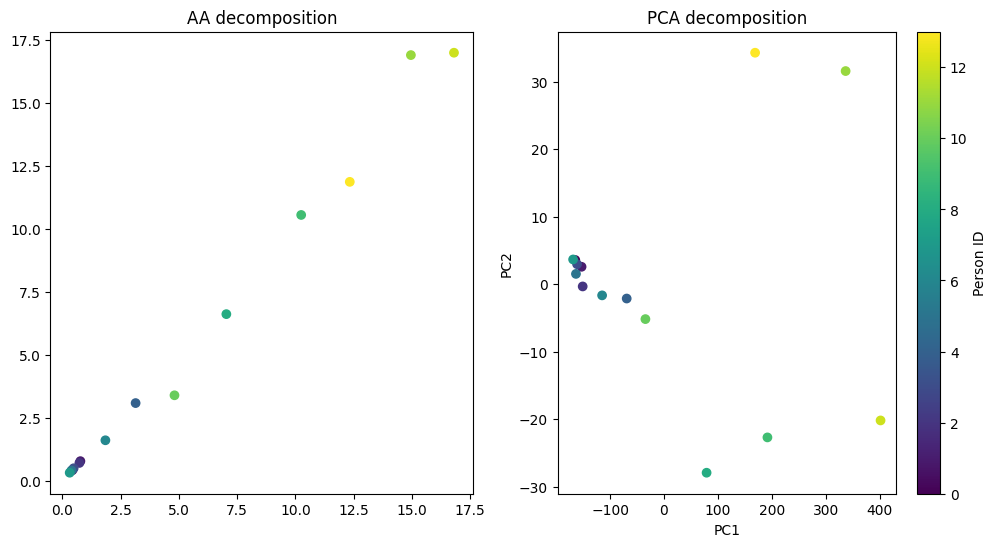

In [223]:
fig, (ax, ax1) = plt.subplots(1,2, figsize=(12, 6), dpi=100)
ax.set_title('AA decomposition')
sc = ax.scatter(X_plot[:,0], X_plot[:,1], c=range(len(X_plot)))#,'k-', linewidth=2)
# cbar = plt.colorbar(sc)
# cbar.set_label('Person ID')

ax1.set_title('PCA decomposition')
sc = ax1.scatter(X_train_transformed[:,0], X_train_transformed[:,1], c=range(len(X_train_transformed)))
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
cbar = plt.colorbar(sc)
cbar.set_label('Person ID')

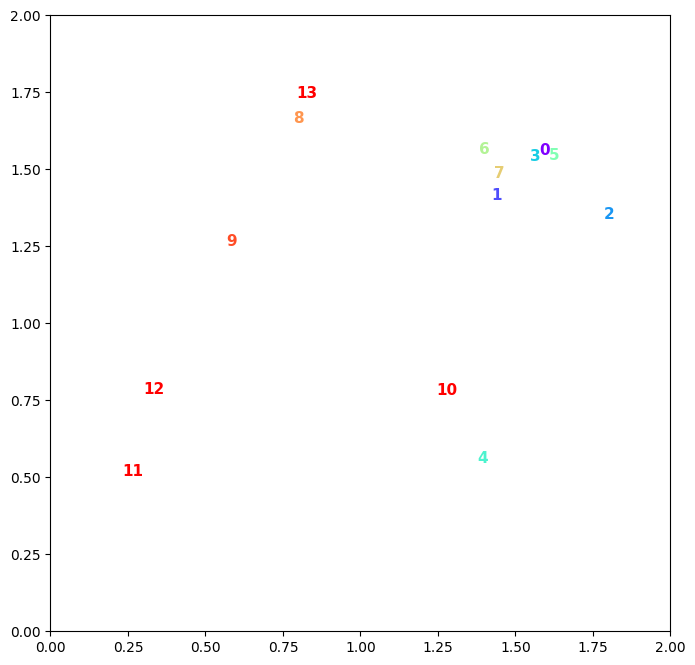

In [255]:
from minisom import MiniSom

som_shape = (2, 2)
som = MiniSom(som_shape[0], som_shape[1], n_components, sigma=0.1, learning_rate=0.5)

som.pca_weights_init(X_plot)
som.train_batch(X_plot, 5000, verbose=False)

plt.figure(figsize=(8, 8))
y = np.arange(n_components)
for x, t in zip(X_plot, y):  # scatterplot    
    w = som.winner(x)
    xval = w[0]+.5+0.6*np.random.rand(1)-0.3
    yval = w[1]+.5+0.6*np.random.rand(1)-0.3
    plt.text(xval, yval,  str(t), color=plt.cm.rainbow(t / 10.), fontdict={'weight': 'bold',  'size': 11})
    
plt.axis([0, som.get_weights().shape[0], 0,  som.get_weights().shape[1]])
plt.show()

- find cluster center, find alle de personer / trials der tilhører den cluster

- for den cluster tag deres mean response og visualiser som et radar plot

In [267]:
from collections import defaultdict

centroids = som.get_weights()
rows, columns = 2, 2

y = np.arange(n_components)
assigned_centroid = defaultdict(list)
for i, (x, t) in enumerate(zip(X_plot, y)):
    w = som.winner(x)
    xval = w[0]
    yval = w[1]
    assigned_centroid[(xval, yval)].append(i)

assigned_centroid

defaultdict(list,
            {(1, 1): [0, 1, 2, 3, 5, 6, 7],
             (1, 0): [4, 10],
             (0, 1): [8, 9, 13],
             (0, 0): [11, 12]})

In [ ]:
for cluster, idx in assigned_centroid.items():
    cohort_to_id = defaultdict(list)
    for ID in idx:
        if ID > 

In [291]:
for cluster, idx in assigned_centroid.items():
    responses = pd.DataFrame()
    for ID in idx:
        round_response = pd.DataFrame()
        cohort = 'D1_1'
        IDa = ID
        if ID > 7:
            cohort = 'D1_2'
            IDa -= 8
        for rond in rounds:
            # print(IDa)
            IDi = ids[cohort][IDa]
            response = pd.read_csv(f'dataset/{cohort}/{IDi}/{rond}/phase1/response.csv')
            round_response = pd.concat([round_response, response], axis=1)
        round_response = round_response.mean(axis=1)
    responses = pd.concat([responses, round_response], axis=1)
responses

,0
0,1.1


### Stats

In [ ]:
## Mean and variance of biosignals across the phases 
# to make life easier for myself, I am excluding cohort 3
cohorts = ['D1_1', 'D1_2']
ids = {'D1_1': ['ID_1','ID_2','ID_3','ID_4','ID_5','ID_6','ID_7','ID_8'],
       'D1_2': ['ID_1','ID_2','ID_3','ID_4','ID_5','ID_6']}
rounds = ['round_1', 'round_2', 'round_3', 'round_4']
phases = [1,2,3]

HR_mean = np.zeros([3,14])
BVP_mean = np.zeros([3,14])
EDA_mean = np.zeros([3,14])
TEMP_mean = np.zeros([3,14])
HR_std = np.zeros([3,14])
BVP_std = np.zeros([3,14])
EDA_std = np.zeros([3,14])
TEMP_std = np.zeros([3,14])
id_index = 0
for p in phases:
    for cohort in cohorts:
        for ID in ids[cohort]:
            for rond in rounds: 
                    # Phase 1
                    HR = pd.read_csv(f'dataset/{cohort}/{ID}/{rond}/phase{p}/HR.csv', index_col=0,  parse_dates = ["time"])
                    BVP = pd.read_csv(f'dataset/{cohort}/{ID}/{rond}/phase{p}/BVP.csv', index_col=0,  parse_dates = ["time"])
                    EDA = pd.read_csv(f'dataset/{cohort}/{ID}/{rond}/phase{p}/EDA.csv', index_col=0,  parse_dates = ["time"])
                    TEMP = pd.read_csv(f'dataset/{cohort}/{ID}/{rond}/phase{p}/TEMP.csv', index_col=0,  parse_dates = ["time"])
                    HR_mean[p-1,id_index] += 1/4*np.mean(HR["HR"])
                    BVP_mean[p-1,id_index] += 1/4*np.mean(BVP["BVP"])
                    EDA_mean[p-1,id_index] += 1/4*np.mean(EDA["EDA"])
                    TEMP_mean[p-1,id_index] += 1/4*np.mean(TEMP["TEMP"])
                    HR_std[p-1,id_index] += 1/4*np.std(HR["HR"])
                    BVP_std[p-1,id_index] += np.std(BVP["BVP"])
                    EDA_std[p-1,id_index] += np.std(EDA["EDA"])
                    TEMP_std[p-1,id_index] += np.std(TEMP["TEMP"])


print("Average HR of the phases are:", HR_mean)
print("With average standard deviation:", HR_std)
print("Average BVP of the phases are:", BVP_mean)
print("With average standard deviation:", BVP_std)
print("Average EDA of the phases are:", EDA_mean)
print("With average standard deviation:", EDA_std)
print("Average TEMP of the phases are:", TEMP_mean)
print("With average standard deviation:", TEMP_std)



### Clustering 

In [130]:
kmeans = KMeans(n_clusters = 2, n_init = 1, random_state = 1)
y_pred_HR = kmeans.fit_predict(HR_mean.T)
y_pred_BVP = kmeans.fit_predict(BVP_mean.T)
y_pred_EDA = kmeans.fit_predict(EDA_mean.T)
y_pred_TEMP = kmeans.fit_predict(TEMP_mean.T)

print("HR clusters:  ", y_pred_HR)
print("BVP clusters: ", y_pred_BVP)
print("EDA clusters: ", y_pred_EDA)
print("TEMP clusters:", y_pred_TEMP)

HR clusters:   [1 1 0 1 1 0 0 0 0 0 1 1 0 1]
BVP clusters:  [0 0 1 1 0 0 1 0 1 0 0 0 0 1]
EDA clusters:  [0 0 0 0 0 0 0 0 1 1 0 1 1 1]
TEMP clusters: [1 0 1 0 1 0 1 0 1 1 1 1 1 1]


In [131]:
print("HR std clusters:  ", kmeans.fit_predict(HR_std.T))
print("BVP std clusters: ", kmeans.fit_predict(BVP_std.T))
print("EDA std clusters: ", kmeans.fit_predict(EDA_std.T))
print("TEMP std clusters:", kmeans.fit_predict(TEMP_std.T))

HR std clusters:   [1 0 0 0 0 0 1 0 1 0 1 0 0 1]
BVP std clusters:  [0 0 0 0 0 0 0 1 0 1 0 1 0 1]
EDA std clusters:  [0 0 0 0 0 0 0 0 0 1 1 1 1 1]
TEMP std clusters: [0 0 1 0 1 0 1 0 0 0 0 0 0 0]


In [156]:
X_mean = np.concatenate((HR_mean, BVP_mean, EDA_mean, TEMP_mean), axis=0)
pd.DataFrame(X_mean, columns = ['C1_ID_1','C1_ID_2','C1_ID_3','C1_ID_4','C1_ID_5','C1_ID_6','C1_ID_7','C1_ID_8','C2_ID_1','C2_ID_2','C2_ID_3','C2_ID_4','C2_ID_5','C2_ID_6'])

,C1_ID_1,C1_ID_2,C1_ID_3,C1_ID_4,C1_ID_5,C1_ID_6,C1_ID_7,C1_ID_8,C2_ID_1,C2_ID_2,C2_ID_3,C2_ID_4,C2_ID_5,C2_ID_6
0,82.689845,76.836065,67.841294,72.366711,80.658840,72.456463,74.851946,71.846246,73.000070,62.786512,76.261984,85.455537,68.252516,79.575587
1,82.890622,81.008831,73.423317,81.530598,80.842552,72.541661,73.855817,78.207770,76.028232,71.757931,87.140861,86.996287,75.832372,85.392977
2,85.784155,76.010481,68.751603,75.131681,73.186907,72.649759,76.646624,73.031828,73.093736,65.015063,74.789437,81.798956,68.968236,76.517277
3,-0.027353,-0.061445,-0.009079,0.151798,-0.023230,0.007860,0.080375,-0.073909,0.081481,-0.004756,0.019668,0.054696,-0.042908,-0.021196
4,-0.021534,0.001199,-0.075620,-0.051613,-0.000299,0.149970,-0.060487,-0.003647,-0.011361,0.072394,0.051419,0.033412,0.072416,-0.227150
5,0.026443,0.024148,-0.058053,-0.052257,-0.008199,0.062180,-0.080425,0.071513,-0.046568,0.090458,-0.011913,0.093670,-0.011308,0.009138
6,0.430318,0.758052,0.819653,0.532826,3.149007,0.463704,1.704042,0.313954,7.464531,10.679014,4.171694,14.741937,16.704163,9.957615
7,0.417704,0.849969,1.485498,0.535318,3.234184,0.539187,1.354803,0.381542,7.250438,9.675466,3.605163,11.861910,16.779552,13.583563
8,0.356532,0.854565,1.262720,0.461221,3.189749,0.491692,1.385150,0.333858,7.234063,9.904960,7.783409,15.149950,20.841669,16.320645
9,33.700443,32.214713,32.851989,31.840273,32.595174,29.838886,33.959777,30.646254,34.923867,34.320318,34.499284,34.979345,35.154164,34.588345


In [160]:
kmeans = KMeans(n_clusters = 2, n_init = 1, random_state = 1)
y_pred = kmeans.fit_predict(X_mean.T)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int32)

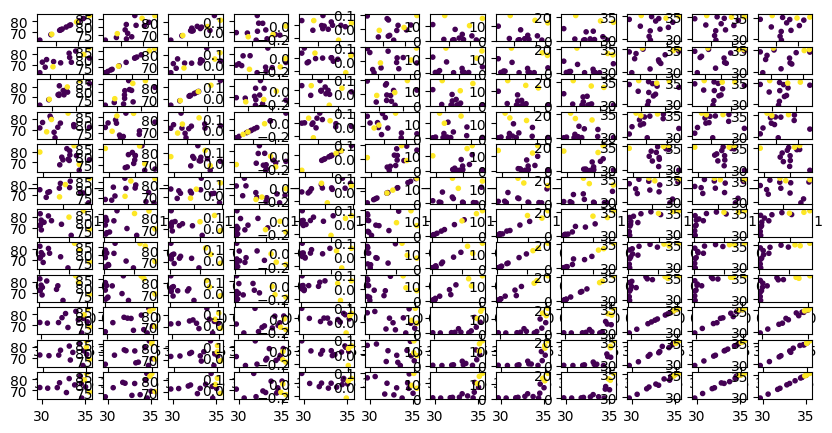

In [182]:
fig, ax = plt.subplots(12, 12, figsize=(10, 5), tight_layout=True)
for i in range(12):
    for j in range(12):
        ax[i,j].scatter(X_mean.T[:,i], X_mean.T[:,j], marker = '.', c = y_pred)
plt.show()

In [176]:
X_mean_mean = np.array((np.mean(HR_mean, axis=0), np.mean(BVP_mean, axis=0), np.mean(EDA_mean, axis=0), np.mean(TEMP_mean, axis=0))).T
y_pred2 = kmeans.fit_predict(X_mean_mean)
y_pred2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int32)

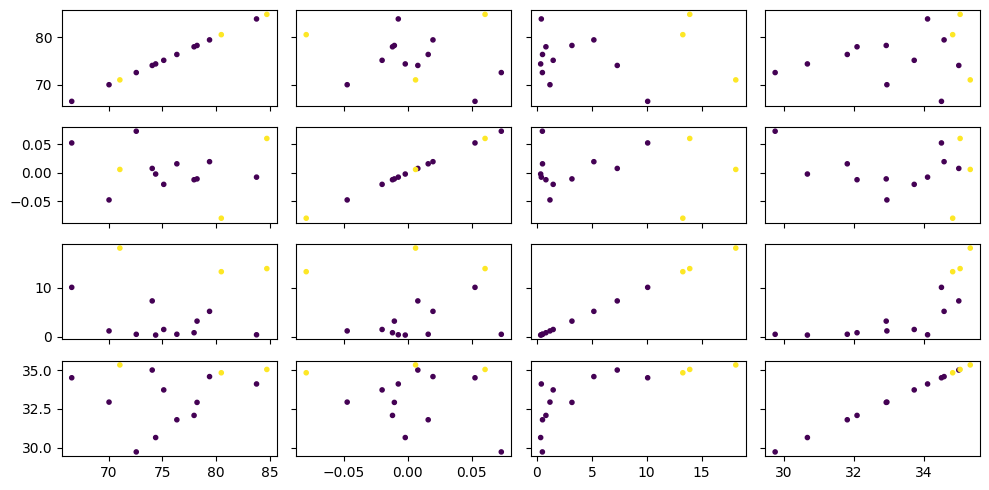

In [198]:
fig, ax = plt.subplots(4, 4, figsize=(10, 5), tight_layout=True, sharex='col', sharey='row')
for i in range(4):
    for j in range(4):
        ax[i,j].scatter(X_mean_mean[:,j], X_mean_mean[:,i], marker = '.', c = y_pred2)
plt.show()

In [280]:
## Combined score of responses across the phases and ID's
# to make life easier for myself, I am excluding cohort 3
cohorts = ['D1_1', 'D1_2']
ids = {'D1_1': ['ID_1','ID_2','ID_3','ID_4','ID_5','ID_6','ID_7','ID_8'],
       'D1_2': ['ID_1','ID_2','ID_3','ID_4','ID_5','ID_6']}
rounds = ['round_1', 'round_2', 'round_3', 'round_4']
phases = [1,2,3]

responses_mean = np.zeros([14,12]) 
id_index = 0
for cohort in cohorts:
    for ID in ids[cohort]:    
        for rond in rounds: 
            for p in phases:
                res = pd.read_csv(f'dataset/{cohort}/{ID}/{rond}/phase{p}/response.csv', index_col = 0)
                responses_mean[id_index,0] += 1/(4+3) * res["upset"] # 1/(4+3) average of 4 rounds and 3 phases
                responses_mean[id_index,1] += 1/(4+3) * res["hostile"] # 1/(4+3) average of 4 rounds and 3 phases
                responses_mean[id_index,2] += 1/(4+3) * res["alert"] # 1/(4+3) average of 4 rounds and 3 phases
                responses_mean[id_index,3] += 1/(4+3) * res["ashamed"] # 1/(4+3) average of 4 rounds and 3 phases
                responses_mean[id_index,4] += 1/(4+3) * res["inspired"] # 1/(4+3) average of 4 rounds and 3 phases
                responses_mean[id_index,5] += 1/(4+3) * res["nervous"] # 1/(4+3) average of 4 rounds and 3 phases
                responses_mean[id_index,6] += 1/(4+3) * res["determined"] # 1/(4+3) average of 4 rounds and 3 phases
                responses_mean[id_index,7] += 1/(4+3) * res["attentive"] # 1/(4+3) average of 4 rounds and 3 phases
                responses_mean[id_index,8] += 1/(4+3) * res["afraid"] # 1/(4+3) average of 4 rounds and 3 phases
                responses_mean[id_index,9] += 1/(4+3) * res["active"] # 1/(4+3) average of 4 rounds and 3 phases
                responses_mean[id_index,10] += 1/(4+3) * (res["frustrated"]/2) # 1/(4+3) average of 4 rounds and 3 phases
                if p == 2:
                    responses_mean[id_index,11] += 1/(4) * (res["difficulty"]/2) # 1/(4) average of 4 rounds
        id_index += 1




In [248]:
pd.DataFrame(responses_mean.T, columns = ['C1_ID_1','C1_ID_2','C1_ID_3','C1_ID_4','C1_ID_5','C1_ID_6','C1_ID_7','C1_ID_8','C2_ID_1','C2_ID_2','C2_ID_3','C2_ID_4','C2_ID_5','C2_ID_6'])

,C1_ID_1,C1_ID_2,C1_ID_3,C1_ID_4,C1_ID_5,C1_ID_6,C1_ID_7,C1_ID_8,C2_ID_1,C2_ID_2,C2_ID_3,C2_ID_4,C2_ID_5,C2_ID_6
0,1.857143,2.571429,3.285714,3.000000,3.142857,1.857143,1.857143,2.285714,2.000000,2.428571,2.142857,2.000000,2.714286,2.714286
1,1.714286,1.714286,2.285714,1.714286,1.714286,1.857143,1.714286,1.714286,1.714286,1.857143,2.142857,1.714286,1.857143,2.000000
2,2.000000,3.285714,1.857143,4.714286,3.857143,4.142857,2.285714,4.285714,5.142857,3.714286,3.857143,2.142857,3.285714,3.000000
3,1.857143,2.000000,1.714286,2.857143,3.857143,1.857143,1.857143,2.714286,1.714286,2.142857,2.857143,2.000000,2.000000,2.000000
4,3.571429,1.714286,NaN,4.857143,4.285714,3.571429,1.714286,4.285714,4.571429,3.428571,2.285714,2.000000,2.571429,4.428571
5,1.857143,2.000000,2.142857,2.285714,2.000000,1.857143,2.571429,3.142857,1.714286,2.000000,2.714286,1.714286,2.857143,3.285714
6,NaN,4.000000,NaN,5.857143,4.285714,4.285714,4.285714,4.571429,5.285714,5.285714,5.000000,3.285714,3.571429,5.571429
7,NaN,3.857143,4.142857,5.571429,4.428571,4.142857,3.714286,4.285714,5.428571,6.142857,4.571429,2.571429,3.857143,4.428571
8,NaN,1.714286,2.142857,1.714286,1.714286,1.714286,1.714286,1.714286,1.714286,1.714286,2.285714,1.714286,1.714286,1.714286
9,NaN,2.714286,3.857143,6.285714,3.857143,3.714286,2.142857,3.857143,4.857143,3.714286,5.000000,2.714286,3.285714,4.000000


In [282]:
np.nanmean(responses_mean, axis=1)

array([2.21428571, 2.46428571, 2.64285714, 3.76488095, 3.29761905,
       2.82291667, 2.38244048, 3.20684524, 3.13392857, 3.17113095,
       3.08482143, 2.12946429, 2.69642857, 3.2172619 ])

<BarContainer object of 14 artists>

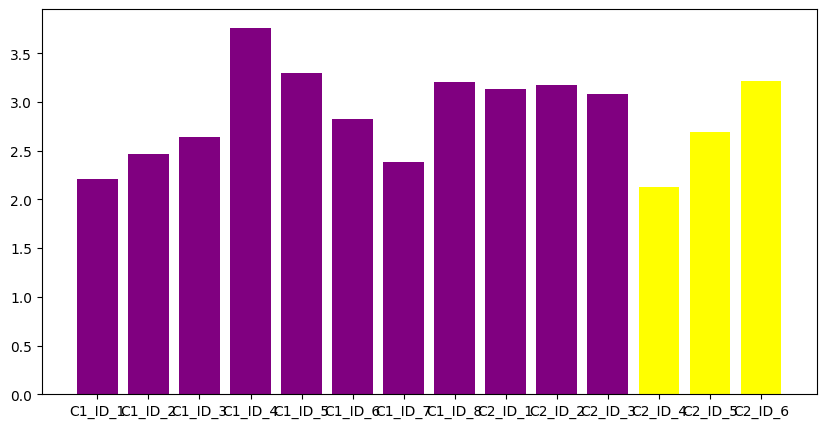

In [288]:
colors = []
for i in range(len(y_pred2)):
    if y_pred2[i]==0:
        colors.append("purple")
    elif y_pred2[i] == 1:
        colors.append("yellow")
fig = plt.figure(figsize =(10, 5))
plt.bar(x = ['C1_ID_1','C1_ID_2','C1_ID_3','C1_ID_4','C1_ID_5','C1_ID_6','C1_ID_7','C1_ID_8','C2_ID_1','C2_ID_2','C2_ID_3','C2_ID_4','C2_ID_5','C2_ID_6'], height = np.nanmean(responses_mean, axis=1), color = colors)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=aad321cd-5b13-4522-860e-4bbfa7104698' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>